# CIFAR10 dataset

## Import all necessary Tensorflow and Keras libraries for creating CNN's

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
import os

## Load Datasets


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape # should output number of images, dimensions, dimensions, number of rgb channels

(50000, 32, 32, 3)

## Reshape data

In [4]:
# with .reshape() method,  pass -1 as first arg for no effect
# pass nothing as second arg since we want no effect
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Declare classes of the images

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
len(classes)

10

## Create function to display images

In [7]:
def plot_image(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

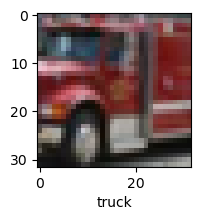

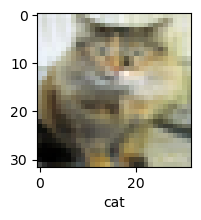

In [9]:
plot_image(X_train, y_train, 88)
plot_image(X_train, y_train, 169)

## Normalize our data

Whenever we have an image we have to divide each pixel value by 255 bcos the pixels values are 255 for R G B channels.

Dividing by 255 would normalize the value to a 0 to 1 range

In [10]:
X_train = X_train / 255
X_test = X_test / 255

## Build a CNN model

In [12]:
# create a sequential model
model = Sequential()
# add a 1st Convolutional layer to it
# 32 different filters
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation="relu", input_shape=(32,32,3)))
# add Max Pooling layer, goes through the image and picks maximum values of pixels
model.add(MaxPooling2D(pool_size=(2,2)))

# add another layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten output in order to pass it to the Dense layer
model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

## Can also create a CNN with this syntax and different parameters

In [15]:
cnn = models.Sequential([

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Input Layer the 1st Layer is a flatten Layer
    layers.Flatten(input_shape=(32,32,3)),
    # 2 Deep Layers of 3000 and 1000 neurons
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    # Last Layer has 10 neurons since we have 10 categories to pick from
    layers.Dense(10, activation = 'sigmoid')
])

## Compile model

In [16]:
model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

## Train Model

In [51]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=6)

Epoch 1/6
1561/1563 [============================>.] - ETA: 0s - loss: 0.7475 - accuracy: 0.7407

TypeError: in user code:

    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\training.py", line 1759, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 691, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\biyen\anaconda3\lib\site-packages\keras\metrics\metrics.py", line 3672, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'


## Make predictions

In [31]:
y_pred = model.predict(X_test)
# outputs 10 different values outputed by our 10 output neurons/classes

313/313 [==============================] - 3s 9ms/step


In [33]:
# we need the maximum value of the 10 which corresponds to the probability with heighest class
y_pred = [np.argmax(arr) for arr in y_pred]

In [34]:
# reshape y test data
y_test = y_test.reshape(-1,)

Lets try and predict image with index 48

In [45]:
y_pred[48]

7

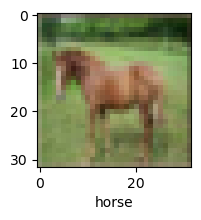

In [44]:
plot_image(X_test, y_test, 48)

In [46]:
classes[7]

'horse'

## Report of Accuracy

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.85      0.73      0.79      1000
           2       0.53      0.60      0.56      1000
           3       0.53      0.49      0.51      1000
           4       0.65      0.63      0.64      1000
           5       0.64      0.53      0.58      1000
           6       0.68      0.84      0.75      1000
           7       0.63      0.80      0.71      1000
           8       0.88      0.69      0.77      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

